1. Initialize the Weights Vector w (random)
2. Pick a learning-rate parameter n, which is small positive real number. 
3. Consider each training example t=(x,y) in turn.
  (a) let y' = wx
  (b) if y' and y have the same sign, then do nothing, t is properly classified.
  (c) However, y' and y are different signs, or y' = 0, replace w by w + nyx. This will adjust it slightly in one direction or the other.

In [24]:
import numpy as np
import pandas as pd 

In [25]:
# X - feature Matrix
# y - observations (labels)
# w - weights
# p - probabilities 
# n - learning-rate

In [26]:
X = np.array([[0,0,1],[0,1,1],[1,1,1],[0,1,0]])
y = np.array([[0],[0],[1],[1]])
w = np.random.randn(3,1)
p = np.zeros((4,1))
n = 0.5


In [27]:
df_w = pd.DataFrame(w)
df_p = pd.DataFrame(p)
df_d = pd.DataFrame(p)

In [28]:
def sigmoid(x):
  ans = 1 / (1 + np.e**(-x))
  return ans

def derivative_sigmoid(x):
  ans = sigmoid(x) * (1 - sigmoid(x))
  return ans


In [29]:
# Lets iterate until we converge
# sigmoid to calculate the probablity of being correct
iter = 5

for i in range(iter):
  # compute the theta or net input
  theta = np.dot(X, w).round(3)

  # probablity of being correct
  prob = []
  for num in theta:
    prob.append(sigmoid(num))
    prob_update = np.array(prob)
  df_p [i+1] = prob_update

  err = y - prob_update

  for num in err:
    w_err = (derivative_sigmoid(num))

  delta = err * w_err
  df_d[i+1] = delta

  update_weights = np.dot(X.T,delta).round(4)
  df_w[i+1] = update_weights

  w = update_weights

print('\nWeights Updated for each Iteration\n')
print((df_w).round(4))

print('\nProbability Updated for each Iteration\n')
print((df_p).round(4))

print('\nError Updated for each Iteration\n')
print((df_d).round(4))


Weights Updated for each Iteration

        0       1       2       3       4       5
0 -1.1373  0.2025  0.0868  0.1203  0.1096  0.1131
1 -0.7574  0.3006  0.0477  0.1251  0.1006  0.1084
2 -0.3900  0.0587 -0.1770 -0.0974 -0.1230 -0.1148

Probability Updated for each Iteration

     0       1       2       3       4       5
0  0.0  0.4037  0.5147  0.4559  0.4758  0.4693
1  0.0  0.2410  0.5888  0.4678  0.5070  0.4945
2  0.0  0.0924  0.6369  0.4895  0.5369  0.5217
3  0.0  0.3193  0.5747  0.5120  0.5312  0.5252

Error Updated for each Iteration

     0       1       2       3       4       5
0  0.0 -0.0901 -0.1230 -0.1074 -0.1126 -0.1110
1  0.0 -0.0538 -0.1407 -0.1103 -0.1200 -0.1169
2  0.0  0.2025  0.0868  0.1203  0.1096  0.1131
3  0.0  0.1519  0.1017  0.1150  0.1110  0.1122


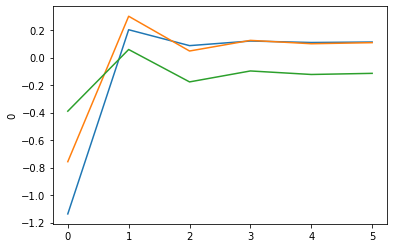

In [30]:
import seaborn as sns
sns.lineplot(data=df_w.iloc[0])
sns.lineplot(data=df_w.iloc[1])
sns.lineplot(data=df_w.iloc[2])